In [41]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
import os

% matplotlib inline

# Definition of tube class

In [29]:
class tube:
    x = np.zeros((0,3))
    def __init__(self, coordinates):
        for node in coordinates:
            node = node.split(',')
            if (len(node) is 3):
                a = np.array([float(item) for item in node])
                a = a.reshape((1,3))
                self.x = np.concatenate((self.x, a), axis=0)
    
    def avg_y(self):
        return np.mean(self.x[:,1])

# Check height of tubes

In [61]:
directory = "/Users/amirhossein/research/cnt_mesh_5_nm_bids"

tubes = []

for i in range(1,10):
    filename = os.path.join(directory, "tube"+str(i)+".dat")
    if (not os.path.isfile(filename)):
        continue
    print("reading file: {}".format(filename))
    with open(filename) as file:
        for line in file:
            x = line.strip().split(";")
            x = x[1:]
            tubes.append(tube(x))

print("number of tubes: {}".format(len(tubes)))
avg_y = np.array([np.mean(tube.x[100:,1]) for tube in tubes[:1500]])

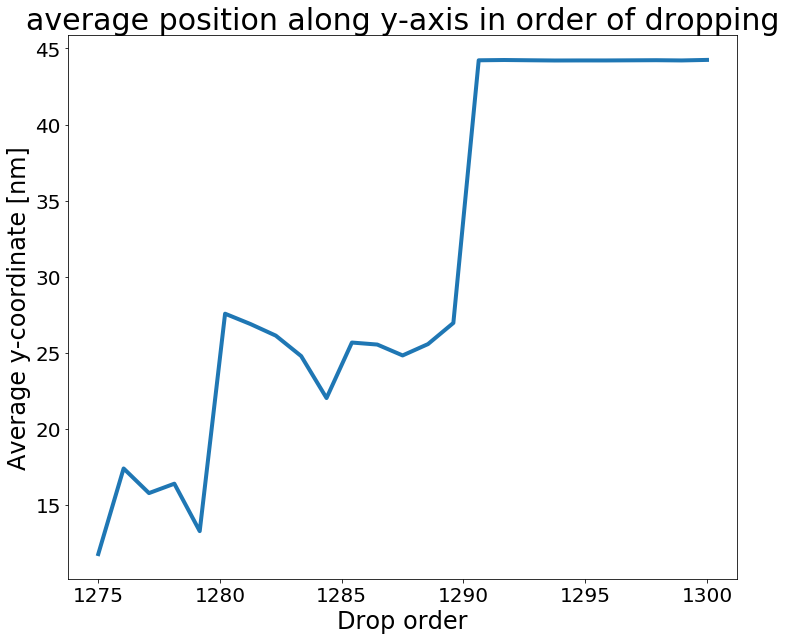

In [66]:
min_order, max_order = 1275, 1300
drop_order = np.linspace(min_order,max_order, max_order-min_order)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)
ax.plot(drop_order,avg_y[min_order:max_order], linewidth=4)
ax.set_title("average position along y-axis in order of dropping",fontsize=30)
ax.set_xlabel("Drop order",fontsize=24)
ax.set_ylabel("Average y-coordinate [nm]",fontsize=24)
ax.tick_params(labelsize=20)

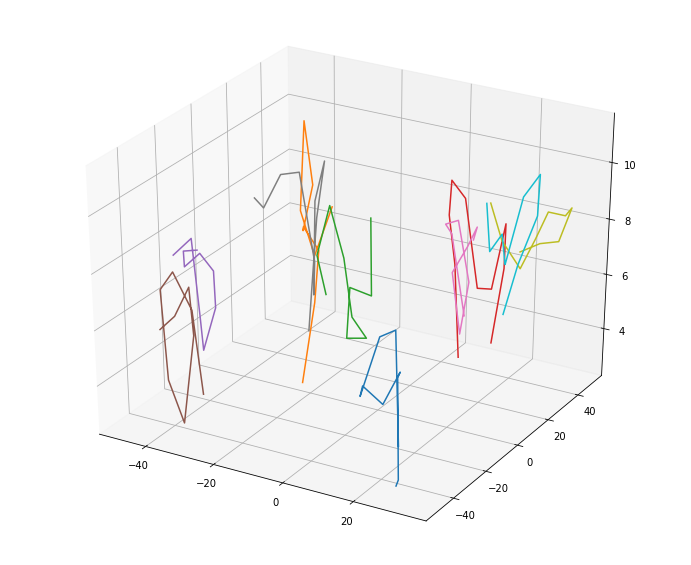

In [82]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)

x = tubes[0].x[:,0]
y = tubes[0].x[:,1]
z = tubes[0].x[:,2]

begin=300
n_tube=10
for tube in tubes[begin:begin+n_tube]:
    ax.plot(tube.x[:,0], tube.x[:,2], tube.x[:,1])

plt.show()